In [4]:
import os
import json

dir = '../fetch/data/rating_changes'

In [12]:
contest_data = []

for f in os.listdir(dir):
    if not f.endswith('.json'):
        continue
    # try to load by json, skip if failed
    try:
        with open(os.path.join(dir, f)) as file:
            data = json.load(file)
        contest_data.append({
            'rank': [x['rank'] for x in data],
            'old_rating': [x['oldRating'] for x in data],
            'new_rating': [x['newRating'] for x in data]
        })
    except:
        continue

print('Total {} Contest'.format(len(contest_data)))
    

Total 210 Contest


Epoch 1/20
48003/48003 [==============================] - 138s 3ms/step - loss: 6766.8940 - val_loss: 2255.7625
Epoch 2/20
48003/48003 [==============================] - 142s 3ms/step - loss: 2526.8394 - val_loss: 2067.9971
Epoch 3/20
48003/48003 [==============================] - 148s 3ms/step - loss: 2122.6384 - val_loss: 2048.5090
Epoch 4/20
48003/48003 [==============================] - 143s 3ms/step - loss: 2093.9619 - val_loss: 2071.7808
Epoch 5/20
48003/48003 [==============================] - 141s 3ms/step - loss: 2083.7856 - val_loss: 2005.1648
Epoch 6/20
48003/48003 [==============================] - 147s 3ms/step - loss: 2080.1421 - val_loss: 2016.5007
Epoch 7/20
48003/48003 [==============================] - 140s 3ms/step - loss: 2078.2717 - val_loss: 2111.2520
Epoch 8/20
48003/48003 [==============================] - 137s 3ms/step - loss: 2075.5493 - val_loss: 2056.9912
Epoch 9/20
48003/48003 [==============================] - 137s 3ms/step - loss: 2071.8113 - val_loss: 20

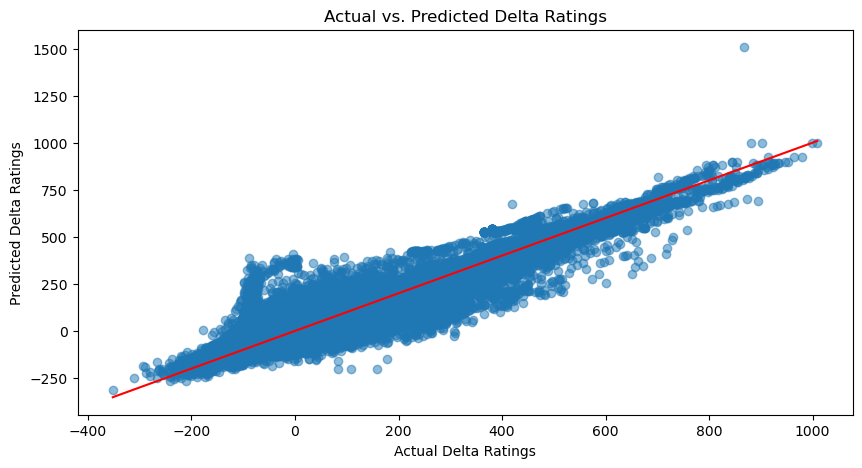

In [13]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 提取数据并计算 delta_rating
ranks = []
old_ratings = []
delta_ratings = []

for data in contest_data:
    ranks.extend(data['rank'])
    old_ratings.extend(data['old_rating'])
    delta_ratings.extend(np.array(data['new_rating']) - np.array(data['old_rating']))

# 转换成 numpy 数组
ranks = np.array(ranks)
old_ratings = np.array(old_ratings)
delta_ratings = np.array(delta_ratings)

# # 归一化或标准化数据，这里我们使用简单的标准化
# ranks = (ranks - np.mean(ranks)) / np.std(ranks)
# old_ratings = (old_ratings - np.mean(old_ratings)) / np.std(old_ratings)

# 整合特征
X = np.vstack((ranks, old_ratings)).T
y = delta_ratings

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 构建模型
model = Sequential([
    Dense(64, input_dim=2, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

# 编译模型
model.compile(optimizer='adam', loss='mean_squared_error')

# 训练模型
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2, verbose=1)

# 预测测试集
predictions = model.predict(X_test).flatten()

# 绘制预测结果与实际结果
plt.figure(figsize=(10, 5))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Actual Delta Ratings')
plt.ylabel('Predicted Delta Ratings')
plt.title('Actual vs. Predicted Delta Ratings')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Perfect predictions



In [11]:
# print loss on validation set
print('Validation Loss:', model.evaluate(X_test, y_test))
# print averge loss of each prediction
print('Average Loss:', np.mean(np.abs(predictions - y_test)))

2588/2588 [==============================] - 4s 2ms/step - loss: 1961.3871
Validation Loss: 1961.3870849609375
Average Loss: 32.25814263856899
